<a href="https://colab.research.google.com/github/pjmartel/teaching/blob/master/enzymology/Michaelis_Menten_linearizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import linregress
matplotlib.style.use('ggplot')


## Estimativa experimental de parâmetros de cinética enzimática

Assumindo que o comportamento cinético de um enzima (varação da velocida inicial $v_i$ com a concentração de substrao $[S]$) é dado por:

$$v_i = \frac{V_{max}[S]}{K_m+[S]}$$

pretende-se estimar os parâmetros $V_{max}$ e $K_m$ a partir de um conjunto de velocidades experimentais $v_1,v_2,v_2,v_3,...,v_n$ obtidas para concentraçãoes de substrato $[S]_1,[S]_2,[S]_3,...,[S]_n$. A equação de Michaelis-Mente descreve uma hipérbole:

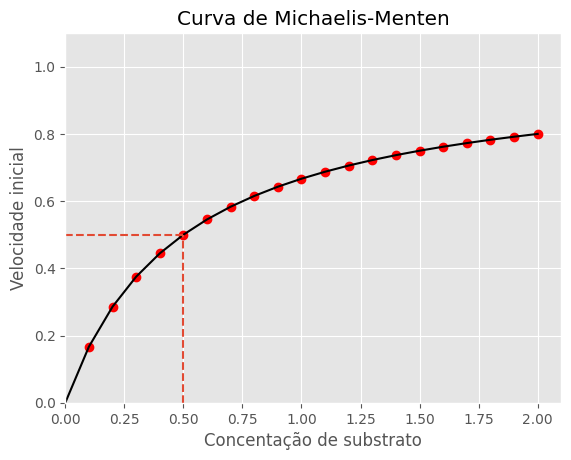

In [18]:
   #@title
Km = 0.5 ; Vmax = 1
smax = 4*Km
sstep = Km/5
def MM(K,V,s):
  return V*s/(K+s)
s = np.arange(Km/5,smax+sstep,sstep)
v = MM(Km,Vmax,s)
plt.plot(s,v,"ro",(0,*s),(0,*v),"k-")
plt.hlines(Vmax/2,0,Km,linestyle="dashed")
plt.vlines(Km,0,Vmax/2,linestyle="dashed")
plt.axis([0,1.05*smax,0,1.1*Vmax])
plt.xlabel("Concentação de substrato")
plt.ylabel("Velocidade inicial")
plt.title("Curva de Michaelis-Menten")
plt.show()

De um modo geral os pontos experimentais irão estar afectados de erro, pelo que o seu ajusto à curva não será perfeito. O slider abaixo permite alterar o valor do "erro" aleatório adicionado aos valores teóricos (recalcular as células após ajustar o valor):

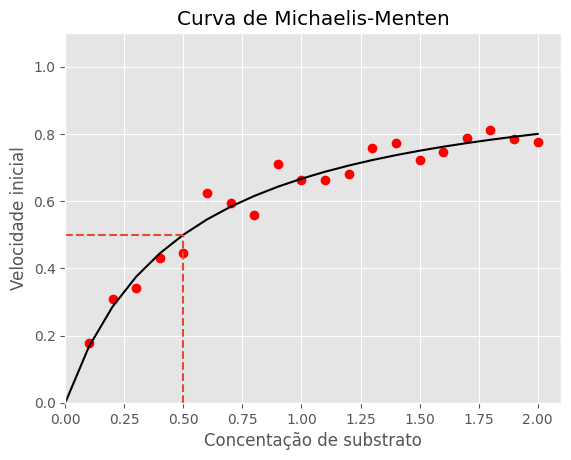

In [24]:
#@title
std_err = 0.08 #@param {type:"slider", min:0.0, max:0.5, step:0.01}
std_err = std_err*Km
err = rnd.normal(0,std_err,len(v))
ve = v + err
plt.plot(s,ve,"ro",(0,*s),(0,*v),"k-")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
#plt.axis([0,2,0,1])
plt.hlines(Vmax/2,0,Km,linestyle="dashed")
plt.vlines(Km,0,Vmax/2,linestyle="dashed")
plt.axis([0,1.05*smax,0,1.1*Vmax])
plt.xlabel("Concentação de substrato")
plt.ylabel("Velocidade inicial")
plt.title("Curva de Michaelis-Menten")
plt.show()

A estimação dos parâmetros $V_{max}$ e $K_m$ pode fazer-se por ajuste não-linear directo da curva de Michaelis-Menten aos pontos experimentais (busca dos valores dos parâmetros que minimizam a distância da curva aos pontos experimantais). No entanto, é práctica usual fazer uma *linearização* prévia dos dados experimentais, de modo a transformar o problema do ajuste não-linear num problema de regressão linear simples. Existem alguns métodos de liearização mais usuais, a saber:
- Linearizaçao de Lineweaver-Burk
- Linearização de Hanes-Woolf
- Linearização de Eadie-Hofstee
- Método linear directo de Eisenthal e Cornish-Bowden

A linearização de Linweaver-Burk é a mais antiga e mais usada, consisintdo na simples inversão dos lados esquerdo e direito da equação de Michaelis-Menten:
<br><br>
$$v_i = \frac{V_{max}[S]_i}{K_m+[S]_i}$$
<br>
$${1 \over v_i} = \frac{K_m+[S]_i}{V_{max}[S]_i}$$
<br>
$$\boxed{{1 \over v_i} = \frac{K_m}{V_{max}}\frac{1}{[S]_i}+{1 \over V_{max}}}$$
<br>
desta forma, um gráfico teórico (sem erro experimental dos valores dos valores $1 / v_i$ em função dos correspondentes  $1 / [S]_i$ deverá produzir um recta:

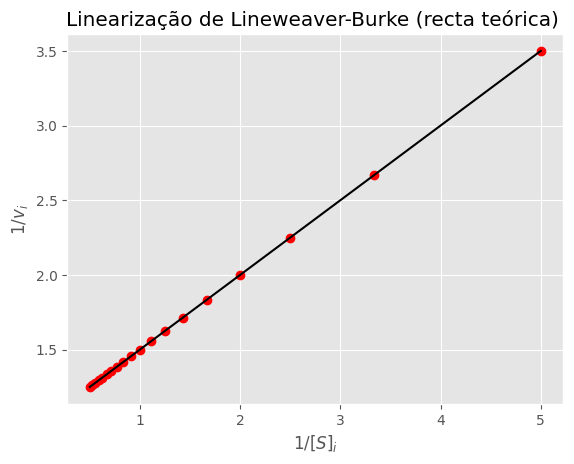

In [25]:
#@title
sinv = 1 /s[1:]
vinv = 1 /v[1:]
plt.plot(sinv,vinv,"ro",sinv,vinv,"k-")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis()
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.title("Linearização de Lineweaver-Burke (recta teórica) ")
plt.show()

Na presença de erro experimental:

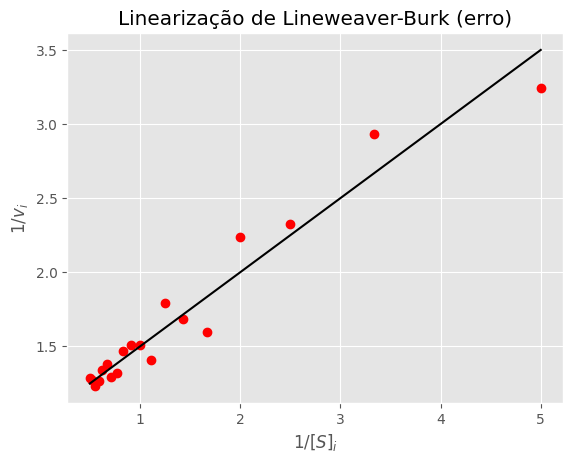

In [26]:
#@title
veinv = 1 /ve[1:]
plt.plot(sinv,veinv,"ro",sinv,vinv,"k-")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.axis()
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.title("Linearização de Lineweaver-Burk (erro)")
plt.show()

Regressão linear para estimativa dos parâmetros

Vmax = 0.937
Km = 0.412
R² = 0.950


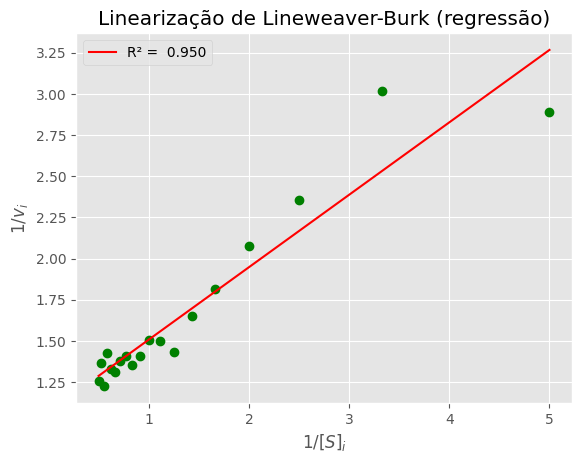

In [6]:
#@title
m, b,r,_,_ = linregress(sinv,veinv)
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
_ = plt.plot(sinv,veinv,'go')
_ = plt.plot(sinv,m*sinv+b,'r-',label="R² = {:6.3f}".format(r))
plt.legend()
plt.title("Linearização de Lineweaver-Burk (regressão)");
print("Vmax = {:.3f}".format(1/b))
print("Km = {:.3f}".format(m/b))
print("R² = {:0.3f}".format(r))

Estimativa de Vmax = 0.951
Estimativa de Km = 0.425
R² = 0.989


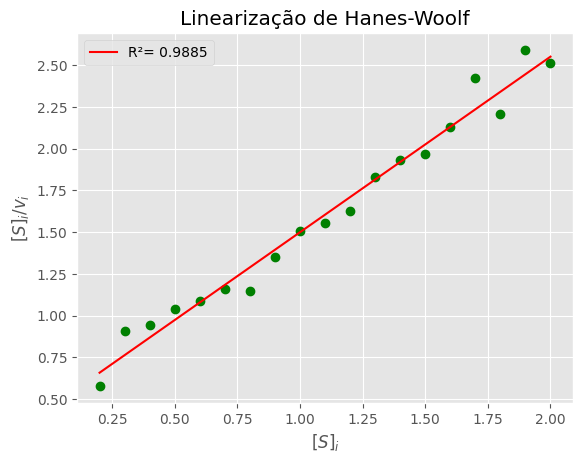

In [7]:
#@title
sh = s[1:]
vh = ve[1:]
m,b,r,_,_ = linregress(sh,sh/vh)
Vmax = 1/m
Km = b/m
print("Estimativa de Vmax = {:.3f}".format(1/m))
print("Estimativa de Km = {:.3f}".format(b/m))
print("R² = {:0.3f}".format(r))
plt.plot(sh,sh/vh,"go")
plt.plot(sh,m*sh+b,"r-",label="R²= {:6.4f}".format(r))
plt.ylabel("$[S]_i/v_i$")
plt.xlabel("$[S]_i$")
plt.title("Linearização de Hanes-Woolf")
plt.legend()
plt.show()

O métod de Lineweaver-Burk tem o problema de criar distorção no padrão de dstribuição dos erros das velocidades, devido à passagem ao inverso. Assim, os erros das velocidades mais baixas são ampliados, e os das velocidades mais altas comprimidos.

No, exemplo abaixo, temos um conjunto de pontos psedo-experimentais, gerados adicionando erro a uma curva com parâmetors $K_m = 12$ e $V_{max}=100$, adicionando erro aleatório aos valores de velocidade.

|$[S]_i$|$v_i $|
|----------|----------|
| 0.98  |  10.0     |
| 1.95  | 12.0 |
| 3.91   | 28.0 |
| 7.81  | 40.0 |
| 15.63 | 55.0 |
| 31.25  | 75.0 |
| 62.5 | 85.0 |
| 125  | 90.0|
| 250  | 97.0|





Vamos começar por calcular a linerização de Lineweaver-Burk e mostrar o ajuste dos pontos à recta:

Estimativa de Vmax = 79.553
Estimativa de Km = 7.625
R² = 0.9666


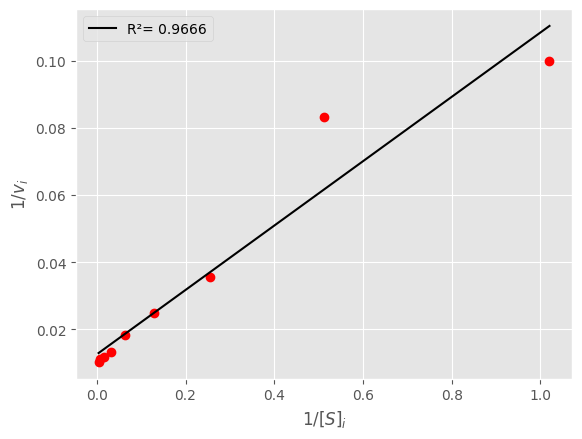

In [8]:
#@title
s = np.array([0.98,1.95,3.91,7.81,15.63,31.25,62.5,125,250])
v = np.array([10,12,28,40,55,75,85,90,97],dtype="float")
m,b,r,_,_ = linregress(1/s,1/v)
Vmax = 1/b
Km = m/b
print("Estimativa de Vmax = {:.3f}".format(1/b))
print("Estimativa de Km = {:.3f}".format(m/b))
print("R² = {:0.4f}".format(r))
plt.plot(1/s,1/v,"ro")
plt.plot(1/s,m*(1/s)+b,"k-",label="R²= {:6.4f}".format(r))
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
plt.legend()
plt.show()

O gráfico acima mostra uma divergência acentuada dos pontos relativamentente à recta ($R^2=0.967$). Vamos analisar o ajuste dos ponts $(v_i,[S]_i)$ à hipérbole de Michaelis-Menten, construída com os parâmetros estimados:

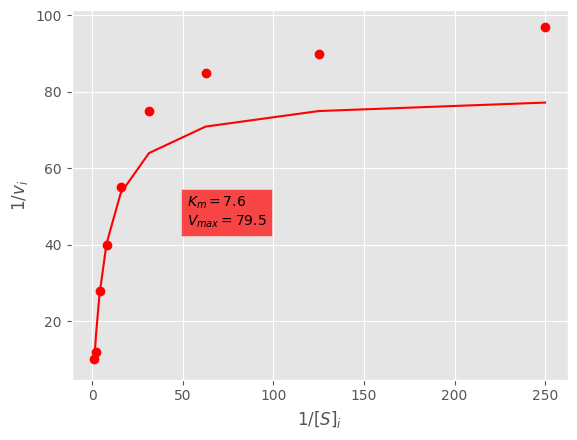

In [9]:
#@title
plt.ylabel("$1/v_i$")
plt.xlabel("$1/[S]_i$")
_ = plt.plot(s,v,"ro",s,MM(7.6,79.55,s),"r-")
plt.text(52,45,"$K_m=7.6$\n$V_{max}=79.5$",bbox=dict(facecolor='red',alpha=0.7));

Aqui mostra-se o ajust dos prontos experimentais aos valores "verdadeiros" ($V_{max} = 100, K_m = 12$). Notar o erro nas concentrações de substratos mais baixas:

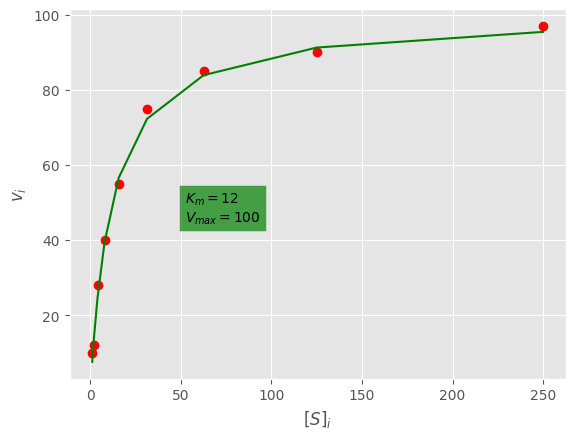

In [10]:
#@title
plt.ylabel("$v_i$")
plt.xlabel("$[S]_i$")
_ = plt.plot(s,v,"ro",s,MM(12,100,s),"g-")
plt.text(52,45,"$K_m=12$\n$V_{max}=100$",bbox=dict(facecolor='green',alpha=0.7));


O erro das concentrações baixas é claramente evidenciado pelo gráfico dos residuais (distância dos pontos à curva de M.,-M.):

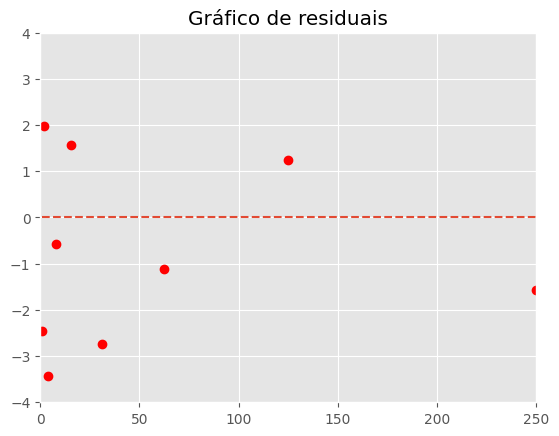

In [11]:
#@title
_ = plt.plot(s,MM(12,100,s)-v,"ro")
plt.axis([0,250,-4,4])
plt.title("Gráfico de residuais")
plt.hlines(0,min(s),max(s),linestyles="dashed");

A linearização de Linweaver-Burk provoca uma distorção do erro largamente assimétrica, com ênfase particular nos valores a concentrações baixas.  Para obviar estes problemas, existem outras linearizações, tal com a de **Hanes-Woolfe**, cuja a expressão é obtida multiplicando por $[S]_i$ os dois lados da expressão de Linewaver-Burke:

<br><br>
$$[S]_i \times \left( {1 \over v_i}\right) = [S]_i \times \left( \frac{K_m}{V_{max}}\frac{1}{[S]_i}+{1 \over V_{max}}\right)$$
<br>

<br>
$$  \boxed{ {[S]_i \over v_i} =  \frac{1}{V_{max}}[S]_i+{K_m \over V_{max}}}$$
<br>
desta forma, a representação de valores de $[S]_i / v_i$ em função de $[S]_i$ irá produzir uma recta com declive $1 / V_{max}$ e ordenada nora origem $K_m / V_{max}$:

Estimativa de Vmax = 100.970
Estimativa de Km = 11.840
R² = 1.000


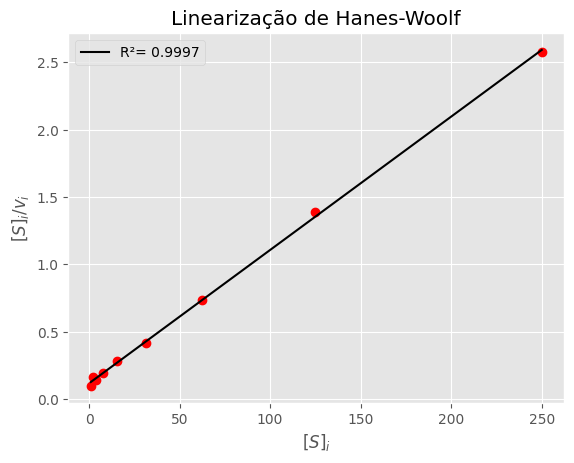

In [12]:
#@title
m,b,r,_,_ = linregress(s,s/v)
Vmax = 1/m
Km = b/m
print("Estimativa de Vmax = {:.3f}".format(1/m))
print("Estimativa de Km = {:.3f}".format(b/m))
print("R² = {:0.3f}".format(r))
plt.plot(s,s/v,"ro")
plt.plot(s,m*s+b,"k-",label="R²= {:6.4f}".format(r))
plt.ylabel("$[S]_i/v_i$")
plt.xlabel("$[S]_i$")
plt.title("Linearização de Hanes-Woolf")
plt.legend()
plt.show()

Como pode ver-se no gráfico acima, a representação de Hanes-Woolf permite uma estimativa muito mais precisa dos parâmetros cinéticos $K_m$ e $V_{max}$ para este conjunto de dados.

Problemas genéricos ajuste de funções não-lineares (como é o caso da equçaõ de M.-M.)
podem ser tratados sem recurso a linearização prévia, por via directa de uma *regressão não-linear*,
na qual é feito ajusto directo à curva do modelo. Exemplo:

Estimativa de K_m: 100.35
Estimativa de Vmax: 11.63


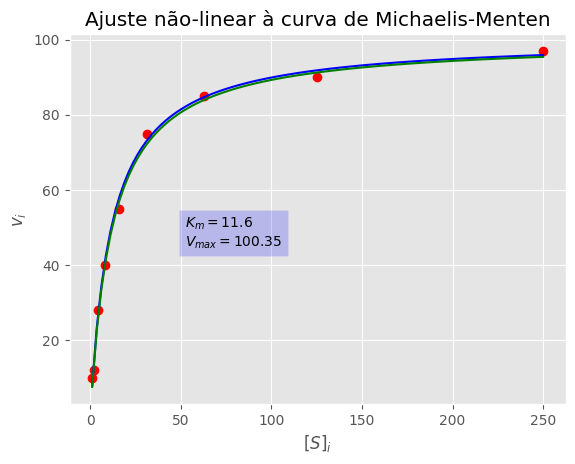

In [13]:
#@title
from scipy.optimize import curve_fit

def func(s,k,v):

  return v*s / (k +s)
initialGuess=[30., 70.]
popt,pcov = curve_fit(func, s, v,initialGuess)
print("Estimativa de K_m: {:.2f}".format(popt[1]))
print("Estimativa de Vmax: {:.2f}".format(popt[0]))
#print(popt)
#print(pcov)
plt.title("Ajuste não-linear à curva de Michaelis-Menten")
plt.ylabel("$v_i$")
plt.xlabel("$[S]_i$")
_ = plt.plot(s,v,"ro")
ss = np.linspace(min(s),max(s),100)
plt.plot(ss, MM(11.6,100.35,ss),"b-")
plt.plot(ss, MM(12,100,ss),"g-")
plt.text(52,45,"$K_m=11.6$\n$V_{max}=100.35$",bbox=dict(facecolor='blue',alpha=0.2));

